In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="You are using `torch.load` with `weights_only=False`")
warnings.filterwarnings("ignore", category=UserWarning, message="The PyTorch API of nested tensors is in prototype stage and will change in the near future.")

%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0,"/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre")
            
import torch
torch.set_printoptions(precision=10)


import yaml
torch.set_float32_matmul_precision('high')
from pathlib import Path

from rdkit import Chem
from rdkit.Chem import Draw
# load model 
from datasets.dataset_utils import fp_loader_configer

fp_loader_configer.select_version("Hash_Entropy")
fp_loader = fp_loader_configer.fp_loader

import numpy as np 
import random
seed=2
torch.cuda.manual_seed_all(seed) 
np.random.seed(seed)
random.seed(seed)



choosing Hash_Entropy_FP_loader


In [2]:
import pickle
with open(f'/root/gurusmart/MorganFP_prediction/inference_data/coconut_loutus_hyun_training/inference_metadata_latest_RDkit.pkl', 'rb') as file:
    smiles_and_names = pickle.load(file)
print(len(smiles_and_names))

526316


In [3]:
from inference.inference_utils import choose_model
from inference.inference_utils import save_molecule_inference
from inference.inference_utils import retrieve_top_k_by_rankingset, compute_cos_sim, unpack_inputs_no_delimiter, build_input, inference_topK
from utils.get_NP_class import get_superclass_and_glycoside

In [18]:
#### For infrastructure, 
#### run this:
# hparams, model  = choose_model_DB_specific_FP("C-NMR", include_test_loader = False)


hparams, model  = choose_model("HSQC")

max_radius = fp_loader.max_radius




loading model weights...
loading /root/gurusmart/MorganFP_prediction/inference_data/inference_rankingset_with_stable_sort/non_collision_FP_rankingset_max_radius_6_dim_16384_stacked_together/FP.pt


Initialized SignCoordinateEncoder[784] with dims [365, 365, 54] and 2 positional encoders. 54 bits are reserved for encoding the final bit


HsqcRankedTransformer saving args
loading model weights done, setting up fp_loader
Hash_Entropy_FP_loader is already setup


In [ ]:
# fp_loader.setup(max_radius=6, out_dim = 16384)
# max_radius = fp_loader.max_radius
# hparams = {'out_dim': 16384}


finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=6


In [ ]:
smiles_pkl_path = "/workspace/SMILES_dataset/test/SMILES/index.pkl"


In [5]:
rankingset_path = f"/root/gurusmart/MorganFP_prediction/inference_data/inference_rankingset_with_stable_sort/non_collision_FP_rankingset_max_radius_{max_radius}_dim_{hparams['out_dim']}_stacked_together/FP.pt"

rankingset_data = torch.load(rankingset_path)#.to("cuda")



In [6]:
rankingset_data = rankingset_data.to(model.device)
len(rankingset_data), len(smiles_and_names)

(526316, 526316)

In [ ]:
"""
Start  unkown compound
"""

'\nStart  unkown compound\n'

In [7]:
# look for the higher cos_sim possible in our dataset
def retrieve_based_on_groudth(groud_truth_FP, k=5):
    topk = retrieve_top_k_by_rankingset(rankingset_data, groud_truth_FP, smiles_and_names, k=k) 
    
    i=0
    for ite, (value, (smile, name, _, _), retrieved_FP) in enumerate(topk):
        print(f"retival #{i+1}, cosine similarity between retrieval and ground truth: {value.item()}_____________________________")
        mol = Chem.MolFromSmiles(smile)
        print("retrived FP", retrieved_FP.to_dense().squeeze().tolist())
        print(f"SMILES: {smile}")
        print(f"Name {name}")
        #check is path file exists
        # plot_NMR(hsqc, c_tensor, h_tensor)
        img = Draw.MolToImage(mol)
        display(img)
        i+=1

In [19]:
# rankingset_data = rankingset_data.to("cuda")

In [ ]:

# from notebook_and_scripts.SMILES_fragmenting.build_dataset_specific_FP.find_frags import count_circular_substructures


In [8]:
Kavaratamide_A_SMILES = "CCCCCCC[C@H](O)CC(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](C)C(=O)O[C@@H](C(C)C)C(=O)N1[C@@H](C(C)C)C(OC)=CC1=O"
Kavaratamide_A_FP = fp_loader.build_mfp_for_new_SMILES(Kavaratamide_A_SMILES)


# Kavaratamide_A_bit_infos = count_circular_substructures(Kavaratamide_A_SMILES)

In [9]:
newCompoundA_SMILES = "O=C1C(NC2=O)CCC(O)N1C(CC3=CC=CC=C3)C(N(C)C(CC4=CC(Br)=C(O)C=C4)C(NC(C(CC)C)C(OC(C)C(C(NC2CCCC[NH3+])=O)NC(C(NC(C(COS(=O)([O-])=O)OC)=O)CC5=CC=CC=C5)=O)=O)=O)=O"
newCompoundA_FP = fp_loader.build_mfp_for_new_SMILES(newCompoundA_SMILES)

Kavaratamide_A


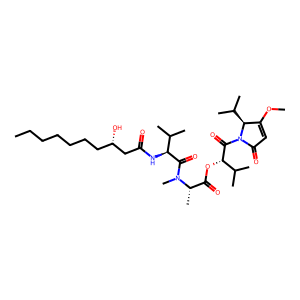

In [10]:
print("Kavaratamide_A")
mol = Chem.MolFromSmiles(Kavaratamide_A_SMILES)
img = Draw.MolToImage(mol)
img

In [ ]:
# s2 = "CCCCCCC(O)CC(=O)NC1CCOC1=O"
# s2_FP = fp_loader.build_mfp_for_new_SMILES(s2)
# s2_FP.nonzero().sum(), Kavaratamide_A_FP.nonzero().sum()

retival #1, cosine similarity between retrieval and ground truth: 0.7378648519515991_____________________________
retrived FP [0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.0, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12909944355487823, 0.12909944355487823, 0.0, 0.0,

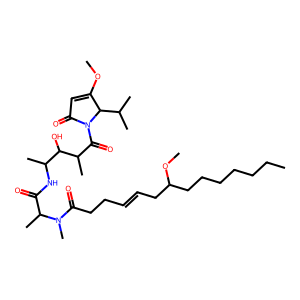

retival #2, cosine similarity between retrieval and ground truth: 0.6067880392074585_____________________________
retrived FP [0.0, 0.0, 0.1714985966682434, 0.1714985966682434, 0.0, 0.1714985966682434, 0.0, 0.0, 0.1714985966682434, 0.0, 0.1714985966682434, 0.1714985966682434, 0.1714985966682434, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1714985966682434, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

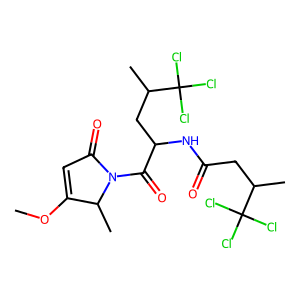

In [11]:
retrieve_based_on_groudth(Kavaratamide_A_FP.unsqueeze(dim=0).to("cuda"), k=2)




Kavaratamide A


_________________________________________________________
Prediction's cosine similarity to ground truth:  tensor(0.5846434236)



________retival #1, cosine similarity to prediction: 0.6230083703994751_________________
________retival's   cosine similarity to ground truth:  0.48880884051322937
SMILES: CCCCCCCCCC(O)CC(=O)OCC
Name ['893842-45-0']


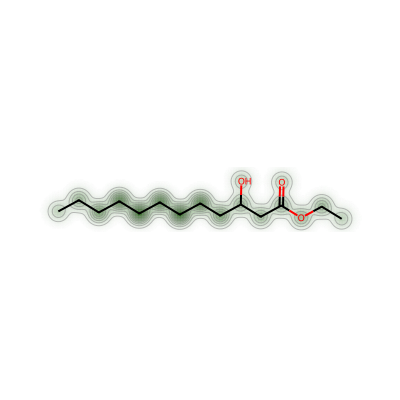

________retival #2, cosine similarity to prediction: 0.6121187210083008_________________
________retival's   cosine similarity to ground truth:  0.5249415636062622
SMILES: CCCCCCCC(O)CC(=O)NC(Cc1ccc(O)cc1)C(O)CC(=O)NC(C(=O)NC1C=CC(=O)NC(C(C)C)C(=O)N(C)C(Cc2ccc(O)cc2)C(=O)OC1)C(C)C
Name ['B1371A']


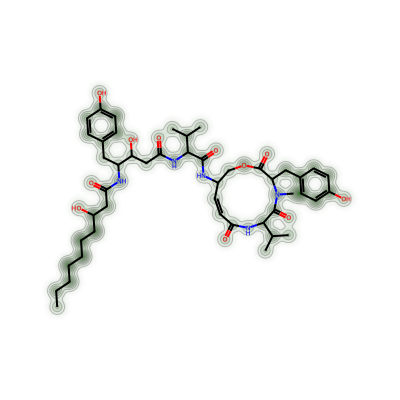

________retival #3, cosine similarity to prediction: 0.6025823950767517_________________
________retival's   cosine similarity to ground truth:  0.4322541058063507
SMILES: C=C1C=CC(=O)N(C)CC(=O)NC(C(O)C(N)=O)C(=O)OC(C(C)CCCCCCCCCCCCC)C(C)C(=O)N1
Name (2R)-2-{(3S,9E,14S,15S)-7,14-Dimethyl-11-methylene-2,5,8,13-tetraoxo-15-[(2S)-2-pentadecanyl]-1-oxa-4,7,12-triazacyclopentadec-9-en-3-yl}-2-hydroxyacetamide


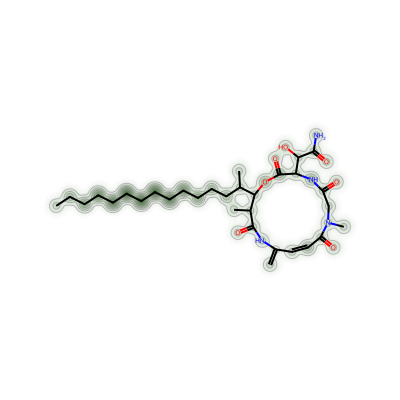

(['CCCCCCCCCC(O)CC(=O)OCC',
  'CCCCCCCC(O)CC(=O)NC(Cc1ccc(O)cc1)C(O)CC(=O)NC(C(=O)NC1C=CC(=O)NC(C(C)C)C(=O)N(C)C(Cc2ccc(O)cc2)C(=O)OC1)C(C)C',
  'C=C1C=CC(=O)N(C)CC(=O)NC(C(O)C(N)=O)C(=O)OC(C(C)CCCCCCCCCCCCC)C(C)C(=O)N1'],
 [['893842-45-0'],
  ['B1371A'],
  '(2R)-2-{(3S,9E,14S,15S)-7,14-Dimethyl-11-methylene-2,5,8,13-tetraoxo-15-[(2S)-2-pentadecanyl]-1-oxa-4,7,12-triazacyclopentadec-9-en-3-yl}-2-hydroxyacetamide'])

In [20]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/Kavaratamide A"
mode = None#"flip_sign"
inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=False, include_hsqc=True,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=3, mode = None, ground_truth_FP=Kavaratamide_A_FP,
                   fp_type = "DB_Specific_Radius", filter_by_MW="from_input",
                #    weight_pred = torch.tensor(-fp_loader.total_entropy_of_all_bits).to("cuda").float()
                )
                   

In [ ]:
def investigate_new_molecule(compound_dir, SMILES):
    return
    mode = None#"flip_sign"

    # for model_type in ["only_1d_DTD", "only_C-NMR_DTD"]:
    for model_type in ['All-NMR', 'HSQC', 'C-NMR', 'H-NMR', 'HSQC_C-NMR', 'HSQC_H-NMR', 'only_1d', "only_1d_DTD", "only_C-NMR_DTD"]:
    # for model_type in ['All-NMR']:
    # for model_type in ['C-NMR', ]:
        
        kwargs = {
            "include_h_nmr" : model_type in ['All-NMR', 'H-NMR', 'HSQC_H-NMR', 'only_1d', "only_1d_DTD"],
            "include_c_nmr" : model_type in ['All-NMR', 'C-NMR', 'HSQC_C-NMR', 'only_1d', "only_1d_DTD", "only_C-NMR_DTD"],
            "include_hsqc" : model_type in ['All-NMR', 'HSQC', 'HSQC_C-NMR', 'HSQC_H-NMR', ]
        }
        
        inputs, NMR_type_indicator = build_input(compound_dir, mode=mode, **kwargs)
        
        hparams, model, test_loader = choose_model_DB_specific_FP(model_type)
        max_radius = fp_loader.max_radius
        print(f"Model type: {model_type}, max_radius: {max_radius}")
        rankingset_path = f"/root/gurusmart/MorganFP_prediction/inference_data/inference_rankingset_with_stable_sort/max_radius_{max_radius}_stacked_together_sparse/FP.pt"
        rankingset_data = torch.load(rankingset_path)#.to("cuda")
        
        save_molecule_inference(SMILES, compound_dir.split("/")[-1], None, model, model_type, inputs, NMR_type_indicator, rankingset_data, smiles_and_names)

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/Kavaratamide A"
Kavaratamide_A_SMILES = "CCCCCCC[C@H](O)CC(=O)N[C@@H](C(C)C)C(=O)N(C)[C@@H](C)C(=O)O[C@@H](C(C)C)C(=O)N1[C@@H](C(C)C)C(OC)=CC1=O"

investigate_new_molecule(compound_dir, Kavaratamide_A_SMILES)

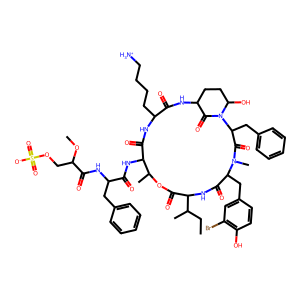

Error in O=C1C(NC2=O)CCC(O)N1C(CC3=CC=CC=C3)C(N(C)C(CC4=CC(Br)=C(O)C=C4)C(NC(C(CC)C)C(OC(C)C(C(NC2CCCC[NH3+])=O)NC(C(NC(C(COS(=O)([O-])=O)OC)=O)CC5=CC=CC=C5)=O)=O)=O)=O
Expecting value: line 1 column 1 (char 0)


(['unknown'], None)

In [30]:
# retrieve_based_on_groudth(newCompoundA_FP.unsqueeze(dim=0).to("cuda"), k=5)
newCompoundA_SMILES = "O=C1C(NC2=O)CCC(O)N1C(CC3=CC=CC=C3)C(N(C)C(CC4=CC(Br)=C(O)C=C4)C(NC(C(CC)C)C(OC(C)C(C(NC2CCCC[NH3+])=O)NC(C(NC(C(COS(=O)([O-])=O)OC)=O)CC5=CC=CC=C5)=O)=O)=O)=O"
Draw.MolToImage(Chem.MolFromSmiles(newCompoundA_SMILES)).show()
get_superclass_and_glycoside(newCompoundA_SMILES)

In [32]:
newCompoundA_FP = fp_loader.build_mfp_for_new_SMILES(newCompoundA_SMILES)

retival #1, cosine similarity between retrieval and ground truth: 0.8002593517303467_____________________________
retrived FP [0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.0, 0.0, 0.08638684451580048, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.0, 0.0, 0.08638684451580048, 0.08638684451580048, 0.0, 0.08638684451580048, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.086386844515800

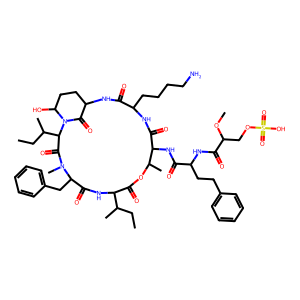

retival #2, cosine similarity between retrieval and ground truth: 0.7915244102478027_____________________________
retrived FP [0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.0, 0.0, 0.08391813933849335, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.0, 0.0, 0.0, 0.08391813933849335, 0.08391813933849335, 0.0, 0.08391813933849335, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

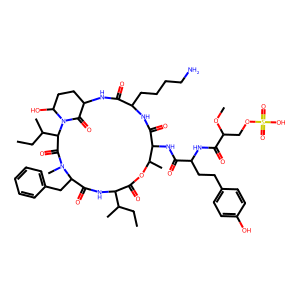

In [33]:
retrieve_based_on_groudth(newCompoundA_FP.unsqueeze(dim=0).to("cuda"), k=2)




new_compound_A


_________________________________________________________
Prediction's cosine similarity to ground truth:  tensor(0.4715662599)



________retival #1, cosine similarity to prediction: 0.6009684801101685_________________
________retival's   cosine similarity to ground truth:  0.4220811724662781
SMILES: CC(C)CC1C(=O)OC(Cc2ccccc2)C(=O)N(C)C(CC(C)C)C(=O)OC(C)C(=O)N(C)C(CC(C)C)C(=O)OC(Cc2ccccc2)C(=O)N(C)C(CC(C)C)C(=O)OC(C)C(=O)N1C
Name "6,18-dibenzyl-3,9,15,21-tetraisobutyl-4,10,12,16,22,24-hexamethyl-1,7,13,19-tetraoxa-4,10,16,22-tetrazacyclotetracosane-2,5,8,11,14,17,20,23-octone"


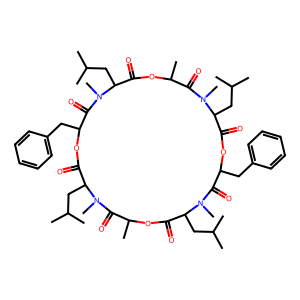

________retival #2, cosine similarity to prediction: 0.5935838222503662_________________
________retival's   cosine similarity to ground truth:  0.3600115478038788
SMILES: COC(=O)C1CC(C)N1C(=O)C(C(C)C)N(O)C(=O)C(CC(C)C)NC(=O)C1CC(OC(C)=O)C(C)N1C(=O)C(CC(C)C)NC(=O)C(NC(=O)C(O)=Cc1cc(Cl)c(OC)c(Cl)c1)C(C)O
Name Bonnevillamide A


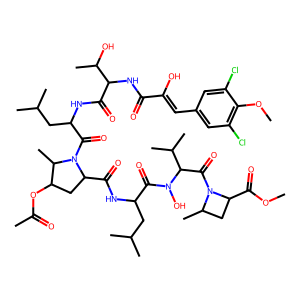

________retival #3, cosine similarity to prediction: 0.5861219763755798_________________
________retival's   cosine similarity to ground truth:  0.3896186053752899
SMILES: CCC(C)C1C(=O)N(C)C(C(C)CC)C(=O)NCC(=O)N(C)C(C(C)C)C(=O)NC(Cc2ccc(OC)cc2)C(=O)OC(C(C)C)C(=O)N2CCCCC2C(=O)N(C)C(C(C)C)C(=O)NC(CC(C)C)C(=O)N(C)C(CC(=O)O)C(=O)N1C
Name Clavariopsin I


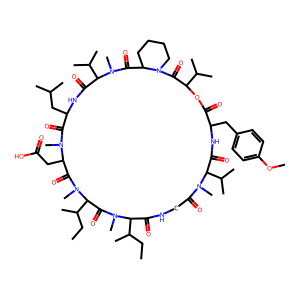

(['CC(C)CC1C(=O)OC(Cc2ccccc2)C(=O)N(C)C(CC(C)C)C(=O)OC(C)C(=O)N(C)C(CC(C)C)C(=O)OC(Cc2ccccc2)C(=O)N(C)C(CC(C)C)C(=O)OC(C)C(=O)N1C',
  'COC(=O)C1CC(C)N1C(=O)C(C(C)C)N(O)C(=O)C(CC(C)C)NC(=O)C1CC(OC(C)=O)C(C)N1C(=O)C(CC(C)C)NC(=O)C(NC(=O)C(O)=Cc1cc(Cl)c(OC)c(Cl)c1)C(C)O',
  'CCC(C)C1C(=O)N(C)C(C(C)CC)C(=O)NCC(=O)N(C)C(C(C)C)C(=O)NC(Cc2ccc(OC)cc2)C(=O)OC(C(C)C)C(=O)N2CCCCC2C(=O)N(C)C(C(C)C)C(=O)NC(CC(C)C)C(=O)N(C)C(CC(=O)O)C(=O)N1C'],
 ['"6,18-dibenzyl-3,9,15,21-tetraisobutyl-4,10,12,16,22,24-hexamethyl-1,7,13,19-tetraoxa-4,10,16,22-tetrazacyclotetracosane-2,5,8,11,14,17,20,23-octone"',
  'Bonnevillamide A',
  'Clavariopsin I'])

In [ ]:
mode = None#"flip_sign"
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_A"

inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=True, include_hsqc=False,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=3, mode = None, ground_truth_FP=newCompoundA_FP, filter_by_MW="from_input",
                   fp_type = "MFP_Specific_Radius")

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_A"
investigate_new_molecule(compound_dir, newCompoundA_SMILES)




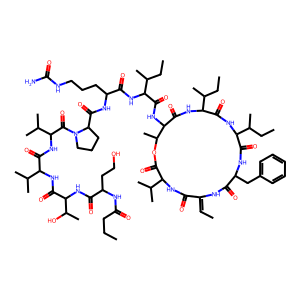

(['Oligopeptides'], False)

In [35]:
new_compoundB_smiles = "CCC(C1C(NC(C(C)CC)C(NC(CC2=CC=CC=C2)C(N/C(C(NC(C(C)C)C(OC(C)C(NC(C(NC(C(NC(C3CCCN3C(C(NC(C(NC(C(NC(C(NC(CCC)=O)CCO)=O)C(O)C)=O)C(C)C)=O)C(C)C)=O)=O)CCCNC(N)=O)=O)C(CC)C)=O)C(N1)=O)=O)=O)=C\C)=O)=O)=O)C"
Draw.MolToImage(Chem.MolFromSmiles(new_compoundB_smiles)).show()
get_superclass_and_glycoside(new_compoundB_smiles)

retival #1, cosine similarity between retrieval and ground truth: 0.9006819128990173_____________________________
retrived FP [0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08164965361356735, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.0, 0.0, 0.08164965361356735, 0.08164965361356735, 0.0, 0.08164965361356735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08164965361356735, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08164965361356

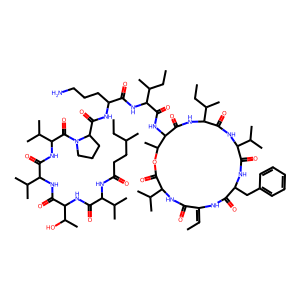

In [36]:
newCompoundB_FP = fp_loader.build_mfp_for_new_SMILES(new_compoundB_smiles)
retrieve_based_on_groudth(newCompoundB_FP.unsqueeze(dim=0).to("cuda"), k=1)

In [ ]:
mode = None#"flip_sign"
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_B1"

inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=True, include_hsqc=False,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=2, mode = None, ground_truth_FP=newCompoundB_FP, filter_by_MW="from_input",
                   fp_type = "MFP_Specific_Radius")




new_compound_B1


_________________________________________________________
Prediction's cosine similarity to ground truth:  tensor(0.3507584631)





([], [])




new_compound_B2


_________________________________________________________
Prediction's cosine similarity to ground truth:  tensor(0.7694178224)



________retival #1, cosine similarity to prediction: 0.8492103219032288_________________
________retival's   cosine similarity to ground truth:  0.8705949783325195
SMILES: CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCC(C)CC)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O
Name "(2~{R})-~{N}-[(1~{S})-4-amino-1-[[(1~{R},2~{S})-1-[[(3~{S},6~{Z},9~{S},12~{R},15~{R},18~{R},19~{R})-9-benzyl-6-ethylidene-3,12-diisopropyl-19-methyl-15-[(1~{S})-1-methylpropyl]-2,5,8,11,14,17-hexaoxo-1-oxa-4,7,10,13,16-pentazacyclononadec-18-yl]carbamoyl]-2-methyl-butyl]carbamoyl]butyl]-1-[(2~{R})-2-[[(2~{S})-2-[[(2~{S},3~{R})-3-hydroxy-2-[[(2~{R})-3-methyl-2-[[(4~{S})-4-methylhexanoyl]amino]butanoyl]amino]butanoyl]amino]-3-methyl-butanoyl]amino]-3-methyl-butanoyl]pyrrol

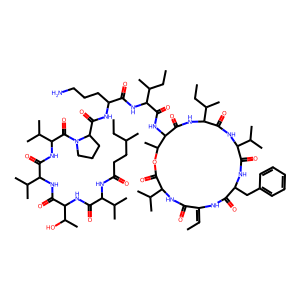

________retival #2, cosine similarity to prediction: 0.8491761088371277_________________
________retival's   cosine similarity to ground truth:  0.8705949783325195
SMILES: CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCCC(C)C)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O
Name 9898671


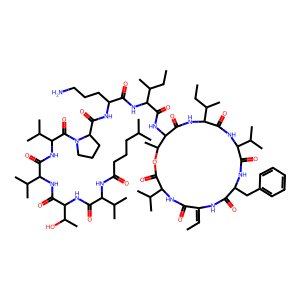

(['CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCC(C)CC)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O',
  'CC=C1NC(=O)C(Cc2ccccc2)NC(=O)C(C(C)C)NC(=O)C(C(C)CC)NC(=O)C(NC(=O)C(NC(=O)C(CCCN)NC(=O)C2CCCN2C(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)CCCC(C)C)C(C)C)C(C)O)C(C)C)C(C)C)C(C)CC)C(C)OC(=O)C(C(C)C)NC1=O'],
 ['"(2~{R})-~{N}-[(1~{S})-4-amino-1-[[(1~{R},2~{S})-1-[[(3~{S},6~{Z},9~{S},12~{R},15~{R},18~{R},19~{R})-9-benzyl-6-ethylidene-3,12-diisopropyl-19-methyl-15-[(1~{S})-1-methylpropyl]-2,5,8,11,14,17-hexaoxo-1-oxa-4,7,10,13,16-pentazacyclononadec-18-yl]carbamoyl]-2-methyl-butyl]carbamoyl]butyl]-1-[(2~{R})-2-[[(2~{S})-2-[[(2~{S},3~{R})-3-hydroxy-2-[[(2~{R})-3-methyl-2-[[(4~{S})-4-methylhexanoyl]amino]butanoyl]amino]butanoyl]amino]-3-methyl-butanoyl]amino]-3-methyl-butanoyl]pyrrolidine-2-carboxamide"',
  '9898671'])

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_B2"

inputs, NMR_type_indicator = build_input(compound_dir, mode=mode,
                     include_h_nmr=False, include_c_nmr=False, include_hsqc=True,
                     )
inference_topK(inputs, NMR_type_indicator, model, rankingset_data, smiles_and_names, 
                   k=2, mode = None, ground_truth_FP=newCompoundB_FP, filter_by_MW="from_input",
                   fp_type = "MFP_Specific_Radius")

In [ ]:

fp_loader.total_entropy_of_all_bits, fp_loader.indices_kept

AttributeError: 'DB_Specific_FP_loader' object has no attribute 'total_entropy_of_all_bits'

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_B1"
# inputs, NMR_type_indicator = build_input(compound_dir,
#                      mode=mode,
#                      include_h_nmr=False, include_c_nmr=False
#                      )
# show_topK(inputs, k=3)

investigate_new_molecule(compound_dir, None)

In [ ]:
compound_dir = "/root/gurusmart/MorganFP_prediction/inference_data/testing_compounds/new_compound_B2"


investigate_new_molecule(compound_dir, None)